<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/K_means_clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [9]:
#产生数据
N =1000 
centers = 4
x,y=make_blobs(n_samples=N,n_features=2,centers=centers,random_state=28)

#模型构建
km = KMeans(n_clusters=centers,init='random',random_state=28)
km.fit(x)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=28,
       tol=0.0001, verbose=0)

In [11]:
#模型的预测
y_hat = km.predict(x)


In [14]:
print("所有样本距离所属簇中心的总距离和为 %.5f" %km.inertia_)
print("所有样本距离所属簇中心点的平均距离为%.5f"%(km.inertia_/N))
print("所有的中心点聚类的中心坐标：")
cluter_centers = km.cluster_centers_
print(cluter_centers)

所有样本距离所属簇中心的总距离和为 1764.43829
所有样本距离所属簇中心点的平均距离为1.76444
所有的中心点聚类的中心坐标：
[[-7.51888142 -2.01003574]
 [ 4.27229942  1.14173211]
 [-6.32351035  7.09545595]
 [ 6.00655335  0.20789386]]


In [16]:
# encoding=utf-8

### 基于scikit包中的创建模拟数据的API创建聚类数据，使用K-means算法对数据进行分类操作，并获得聚类中心点以及总的样本簇中心点距离和值
### K-means官方文档: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import KMeans



## 产生模拟数据
N = 1500 # 样本数
centers = 4 # 划分为4个类别
data,y = ds.make_blobs(N, n_features=2, centers=centers, random_state=28)
data2,y2 = ds.make_blobs(N, n_features=2, centers=centers,  random_state=28)
# vstack垂直（按照行顺序）的把数组给堆叠起来 http://blog.csdn.net/csdn15698845876/article/details/73380803
data3 = np.vstack((data[y == 0][:200], data[y == 1][:100], data[y == 2][:10], data[y == 3][:50]))
y3 = np.array([0] * 200 + [1] * 100 + [2] * 10 + [3] * 50)

print(data)
# 前面定义了四个类别，打印y显示第一个创建的模拟数据属于第0个类别，第2个属于第1个，依次类推
print(y)


# 结果共八张图
# 2 说明k-means擅长划分类圆型数据
# 3 说明k-means不擅长划分偏长型数据
# 7 说明k-means划分不了嵌套的数据（圆里包含另一个圆），几乎所有的聚类都难以划分

[[ 4.60963752  0.48020169]
 [-6.90563049 -0.62838152]
 [ 6.02200924 -0.42255227]
 ...
 [-8.13583711 -2.89528592]
 [ 6.20079698 -0.06480641]
 [ 4.65785457  0.26529753]]
[0 1 2 ... 1 2 0]


In [17]:
#一、数据前期处理跟前面模型是一样
#二、模型的构建
# n_clusters 即K值，也是聚类值
km = KMeans(n_clusters=centers, random_state=28)
km.fit(data, y)

y_hat = km.predict(data)
print ("所有样本距离聚簇中心点的平方距离和:", km.inertia_)
print ("距离聚簇中心点的平均距离:", (km.inertia_ / N))
print ("聚簇中心点：", km.cluster_centers_)

y_hat2 = km.fit_predict(data2)
y_hat3 = km.fit_predict(data3)

def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d




所有样本距离聚簇中心点的平方距离和: 2593.0297169145183
距离聚簇中心点的平均距离: 1.7286864779430122
聚簇中心点： [[ 5.80974338e+00  1.89696469e-03]
 [-7.44342199e+00 -2.00152176e+00]
 [-6.36176159e+00  6.94997331e+00]
 [ 4.34522067e+00  1.33357434e+00]]


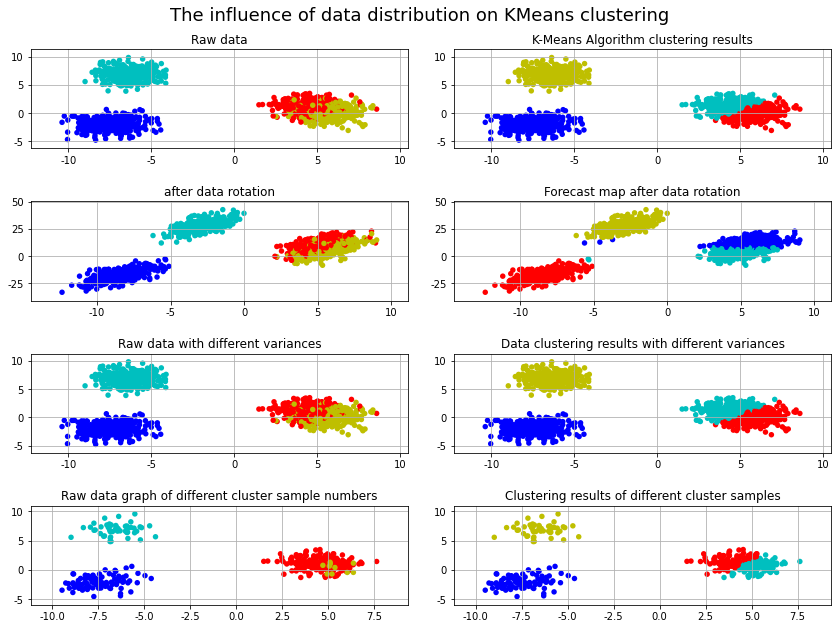

In [20]:
## 五、画图
cm = mpl.colors.ListedColormap(list('rgbmyc'))
plt.figure(figsize=(12, 9), facecolor='w')
plt.subplot(421)
plt.scatter(data[:, 0], data[:, 1], c=y, s=30, cmap=cm, edgecolors='none')

x1_min, x2_min = np.min(data, axis=0)
x1_max, x2_max = np.max(data, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'Raw data')
plt.grid(True)

plt.subplot(422)
plt.scatter(data[:, 0], data[:, 1], c=y_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'K-Means Algorithm clustering results')
plt.grid(True)

m = np.array(((1, 1), (0.5, 5)))
data_r = data.dot(m)
y_r_hat = km.fit_predict(data_r)
plt.subplot(423)
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=30, cmap=cm, edgecolors='none')

x1_min, x2_min = np.min(data_r, axis=0)
x1_max, x2_max = np.max(data_r, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)

plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'after data rotation')
plt.grid(True)

plt.subplot(424)
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_hat, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'Forecast map after data rotation')
plt.grid(True)

plt.subplot(425)
plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data2, axis=0)
x1_max, x2_max = np.max(data2, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'Raw data with different variances')
plt.grid(True)

plt.subplot(426)
plt.scatter(data2[:, 0], data2[:, 1], c=y_hat2, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'Data clustering results with different variances')
plt.grid(True)

plt.subplot(427)
plt.scatter(data3[:, 0], data3[:, 1], c=y3, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data3, axis=0)
x1_max, x2_max = np.max(data3, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'Raw data graph of different cluster sample numbers')
plt.grid(True)

plt.subplot(428)
plt.scatter(data3[:, 0], data3[:, 1], c=y_hat3, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'Clustering results of different cluster samples')
plt.grid(True)

plt.tight_layout(2, rect=(0, 0, 1, 0.97))
plt.suptitle(u'The influence of data distribution on KMeans clustering', fontsize=18)
plt.show()